In [56]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [19]:
student_data = pd.DataFrame({'X': [17,51,27,21,36,48,19,26,54,30], 'Y': [10,1,5,9,4,2,9,6,0,3]})
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

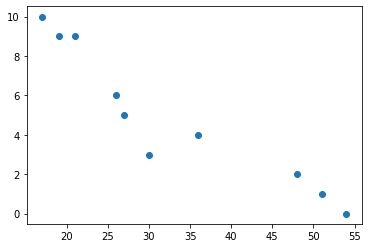

In [22]:
plt.scatter(student_data.X, student_data.Y)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
'''Younger people tend to arrive late more often than older people. 
This is probably due to different life styles (ex.perhaps younger people stay awake until much later thus wake up late )'''

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [24]:
'''When comparing data samples from different populations, covariance is used to determine how much two random variables 
vary together, whereas correlation is used to determine when a change in one variable can result in a change in another. 
From https://acadgild.com/blog/covariance-and-correlation
There is a strong correlation (close to 1) between age and the number of tardies.'''
#correlation:
print(student_data.corr())

#covariance:
print(student_data.cov())

          X         Y
X  1.000000 -0.939163
Y -0.939163  1.000000
            X          Y
X  187.655556 -45.566667
Y  -45.566667  12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [31]:
slope, intercept, r_value, p_value, std_err = stats.linregress(student_data.X, student_data.Y)   
std_err

#I am using linear regression & the outcome variable are the tardies.

0.03139728816158607

Plot your regression model on your scatter plot.

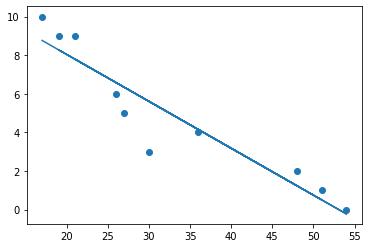

In [42]:
plt.scatter(student_data.X, student_data.Y)
plt.plot(student_data.X, intercept + slope * student_data.X) 

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
#I believe age is a good indicator of whether people tend to be late more often than others.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [53]:
vehicles = pd.read_csv('../../../datasets/vehicles.csv')
vehiclesdf = pd.DataFrame(vehicles)
vdf = vehiclesdf[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
vdf

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500
...,...,...,...,...,...,...
35947,2013,3.0,9.155833,36,1100,244.000000
35948,2014,3.0,9.155833,36,1100,243.000000
35949,2015,3.0,9.155833,36,1100,244.000000
35950,2016,3.0,9.155833,36,1100,246.000000


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [55]:
vdf.corr()
#The most important is fuelbarres/year (closest to 1) and the least important is the year.

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [57]:
Y = vdf['CO2 Emission Grams/Mile']  
X = vdf[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
lm = LinearRegression()      
model = lm.fit(X,Y)        

print("Intercept: ", lm.intercept_)        
print("Coef: ", lm.coef_)         

predictions  = lm.predict(X)  

Intercept:  1.460875864722766e-11
Coef:  [-7.08190198e-15  1.26943356e-13 -5.33764286e-14  2.66418261e-15
 -1.34978599e-17  1.00000000e+00]


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [60]:
import statsmodels.api as sm
results = sm.OLS(Y,X).fit()
results.summary() 

#not sure how to read this. What is the best way to get a summary for the regression?

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   1.000
Model:                                 OLS   Adj. R-squared (uncentered):              1.000
Method:                      Least Squares   F-statistic:                          6.080e+32
Date:                     Tue, 11 Feb 2020   Prob (F-statistic):                        0.00
Time:                             19:01:46   Log-Likelihood:                      9.2690e+05
No. Observations:                    35952   AIC:                                 -1.854e+06
Df Residuals:                        35946   BIC:                                 -1.854e+06
Df Model:                                6                                                  
Covariance Type:                 nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Year                     8.327e-16   8.34e-17      9.984      0.000    6.69e-16    9.96e-16
Cylinders               -1.137e-13   7.42e-15    -15.322      0.000   -1.28e-13   -9.91e-14
Fuel Barrels/Year       -1.243e-14    1.1e-14     -1.132      0.258    -3.4e-14     9.1e-15
Combined MPG            -2.132e-14   4.23e-15     -5.041      0.000   -2.96e-14    -1.3e-14
Fuel Cost/Year          -1.665e-16   4.66e-17     -3.573      0.000   -2.58e-16   -7.52e-17
CO2 Emission Grams/Mile     1.0000   4.82e-16   2.07e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                     4527.092   Durbin-Watson:                   0.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6903.312
Skew:                           0.914   Prob(JB):                         0.00
Kurtosis:                       4.126   Cond. No.                     3.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [61]:
parties_data = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})
parties_data

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

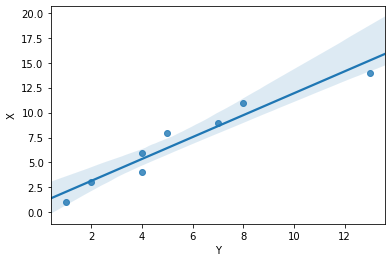

In [62]:
sns.regplot(parties_data.Y, parties_data.X)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
#There is a strong correlation between the variables.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here. 


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
